In [21]:
# Import the requests library.

import requests 
import json 

# Set the request parameters.

app_token = 'HXzjMR36MOwoQwjkMBYiTtL5y'  

api_endpoint = 'https://data.cdc.gov/resource/ixrt-gnsg.json'  

headers = {
    'X-App-Token': app_token,  
    'Content-Type': 'application/json'}

# Make the HTTP request.

response = requests.get(api_endpoint, headers=headers)  

response.json()  

# Print the JSON response from the API call.

print(json.dumps(response.json(), indent=4, sort_keys=True)) 

[
    {
        "datasource": "BRFSS",
        "datavalue": "21.6",
        "datavaluealt": "21.6",
        "datavaluetype": "Crude Prevalence",
        "datavaluetypeid": "CRDPREV",
        "datavalueunit": "%",
        "highconfidencelimit": "26.8",
        "locationabbr": "NV",
        "locationdesc": "Nevada",
        "locationid": "32",
        "lowconfidencelimit": "17.2",
        "question": "At least 14 recent mentally unhealthy days among women aged 18-44 years",
        "questionid": "MTH2_0",
        "stratification1": "Overall",
        "stratificationcategory1": "Overall",
        "stratificationcategoryid1": "OVERALL",
        "stratificationid1": "OVR",
        "topic": "Mental Health",
        "topicid": "MTH",
        "yearend": "2018",
        "yearstart": "2018"
    },
    {
        "datasource": "BRFSS",
        "datavalue": "4.1",
        "datavaluealt": "4.1",
        "datavaluetype": "Mean",
        "datavaluetypeid": "MEAN",
        "datavalueunit": "Number",
  

In [22]:
# Convert the JSON response to a Python dictionary.
# create a df, only locationdesc, yearend, datavalue, question.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

df = pd.DataFrame(response.json())
df = df[["locationdesc", "yearend", "datavalue", "question"]]
df.columns = ["State", "Year", "Prevalence Rate (%)", "Question"]
df


,State,Year,Prevalence Rate (%),Question
0,Nevada,2018,21.6,At least 14 recent mentally unhealthy days amo...
1,Nevada,2020,4.1,Recent mentally unhealthy days among adults ag...
2,Nevada,2018,5.0,Recent mentally unhealthy days among adults ag...
3,Nevada,2019,4.7,Recent mentally unhealthy days among adults ag...
4,Nevada,2017,3.5,Recent mentally unhealthy days among adults ag...
...,...,...,...,...
995,Arizona,2011,3.6,Recent mentally unhealthy days among adults ag...
996,Arizona,2017,4.3,Recent mentally unhealthy days among adults ag...
997,Arizona,2016,3.8,Recent mentally unhealthy days among adults ag...
998,Arizona,2018,3.9,Recent mentally unhealthy days among adults ag...


In [23]:
# set state as index
df = df.set_index("State")
df

,Year,Prevalence Rate (%),Question
State,,,
Nevada,2018,21.6,At least 14 recent mentally unhealthy days amo...
Nevada,2020,4.1,Recent mentally unhealthy days among adults ag...
Nevada,2018,5.0,Recent mentally unhealthy days among adults ag...
Nevada,2019,4.7,Recent mentally unhealthy days among adults ag...
Nevada,2017,3.5,Recent mentally unhealthy days among adults ag...
...,...,...,...
Arizona,2011,3.6,Recent mentally unhealthy days among adults ag...
Arizona,2017,4.3,Recent mentally unhealthy days among adults ag...
Arizona,2016,3.8,Recent mentally unhealthy days among adults ag...


In [24]:
# make Prevalence Rate (%)	numeric
df["Prevalence Rate (%)"] = pd.to_numeric(df["Prevalence Rate (%)"])
df


,Year,Prevalence Rate (%),Question
State,,,
Nevada,2018,21.6,At least 14 recent mentally unhealthy days amo...
Nevada,2020,4.1,Recent mentally unhealthy days among adults ag...
Nevada,2018,5.0,Recent mentally unhealthy days among adults ag...
Nevada,2019,4.7,Recent mentally unhealthy days among adults ag...
Nevada,2017,3.5,Recent mentally unhealthy days among adults ag...
...,...,...,...
Arizona,2011,3.6,Recent mentally unhealthy days among adults ag...
Arizona,2017,4.3,Recent mentally unhealthy days among adults ag...
Arizona,2016,3.8,Recent mentally unhealthy days among adults ag...


In [25]:
import pandas as pd

# Data from the image
data = {
    'State': [
        'Michigan', 'Delaware', 'West Virginia', 'Ohio', 'Nebraska', 'Arkansas',
        'South Carolina', 'Kansas', 'Maine', 'Louisiana', 'Utah', 'Arizona',
        'Minnesota', 'New Jersey', 'Massachusetts', 'Wisconsin', 'Hawaii',
        'Georgia', 'Maryland', 'Mississippi'
    ],
    'Cups of Coffee': [
        2.52, 2.44, 2.35, 2.16, 2.13, 2.12, 2.12, 2.07, 2.05, 2.03,
        1.29, 1.30, 1.32, 1.45, 1.51, 1.52, 1.52, 1.54, 1.57, 1.58
    ]
}

# Create the DataFrame
df2 = pd.DataFrame(data)

# Display the DataFrame
print(df2)


             State  Cups of Coffee
0         Michigan            2.52
1         Delaware            2.44
2    West Virginia            2.35
3             Ohio            2.16
4         Nebraska            2.13
5         Arkansas            2.12
6   South Carolina            2.12
7           Kansas            2.07
8            Maine            2.05
9        Louisiana            2.03
10            Utah            1.29
11         Arizona            1.30
12       Minnesota            1.32
13      New Jersey            1.45
14   Massachusetts            1.51
15       Wisconsin            1.52
16          Hawaii            1.52
17         Georgia            1.54
18        Maryland            1.57
19     Mississippi            1.58


In [26]:
states_in_df2 = df2['State'].tolist()

filtered_df = df.loc[states_in_df2]

filtered_df

,Year,Prevalence Rate (%),Question
State,,,
Michigan,2011,9.4,Postpartum depressive symptoms
Michigan,2012,20.3,At least 14 recent mentally unhealthy days amo...
Delaware,2011,NaN,Postpartum depressive symptoms
Delaware,2014,3.5,Recent mentally unhealthy days among adults ag...
Delaware,2016,3.1,Recent mentally unhealthy days among adults ag...
...,...,...,...
Maryland,2013,14.0,At least 14 recent mentally unhealthy days amo...
Mississippi,2011,NaN,Postpartum depressive symptoms
Mississippi,2021,NaN,Recent mentally unhealthy days among adults ag...


In [27]:
# fill NaN with 0
filtered_df = filtered_df.fillna(0)
filtered_df

,Year,Prevalence Rate (%),Question
State,,,
Michigan,2011,9.4,Postpartum depressive symptoms
Michigan,2012,20.3,At least 14 recent mentally unhealthy days amo...
Delaware,2011,0.0,Postpartum depressive symptoms
Delaware,2014,3.5,Recent mentally unhealthy days among adults ag...
Delaware,2016,3.1,Recent mentally unhealthy days among adults ag...
...,...,...,...
Maryland,2013,14.0,At least 14 recent mentally unhealthy days amo...
Mississippi,2011,0.0,Postpartum depressive symptoms
Mississippi,2021,0.0,Recent mentally unhealthy days among adults ag...


In [30]:
# merge two df
merged_df = pd.merge(filtered_df, df2, on="State")
merged_df


,State,Year,Prevalence Rate (%),Question,Cups of Coffee
0,Michigan,2011,9.4,Postpartum depressive symptoms,2.52
1,Michigan,2012,20.3,At least 14 recent mentally unhealthy days amo...,2.52
2,Delaware,2011,0.0,Postpartum depressive symptoms,2.44
3,Delaware,2014,3.5,Recent mentally unhealthy days among adults ag...,2.44
4,Delaware,2016,3.1,Recent mentally unhealthy days among adults ag...,2.44
...,...,...,...,...,...
370,Maryland,2013,14.0,At least 14 recent mentally unhealthy days amo...,1.57
371,Mississippi,2011,0.0,Postpartum depressive symptoms,1.58
372,Mississippi,2021,0.0,Recent mentally unhealthy days among adults ag...,1.58
373,Mississippi,2019,17.7,At least 14 recent mentally unhealthy days amo...,1.58


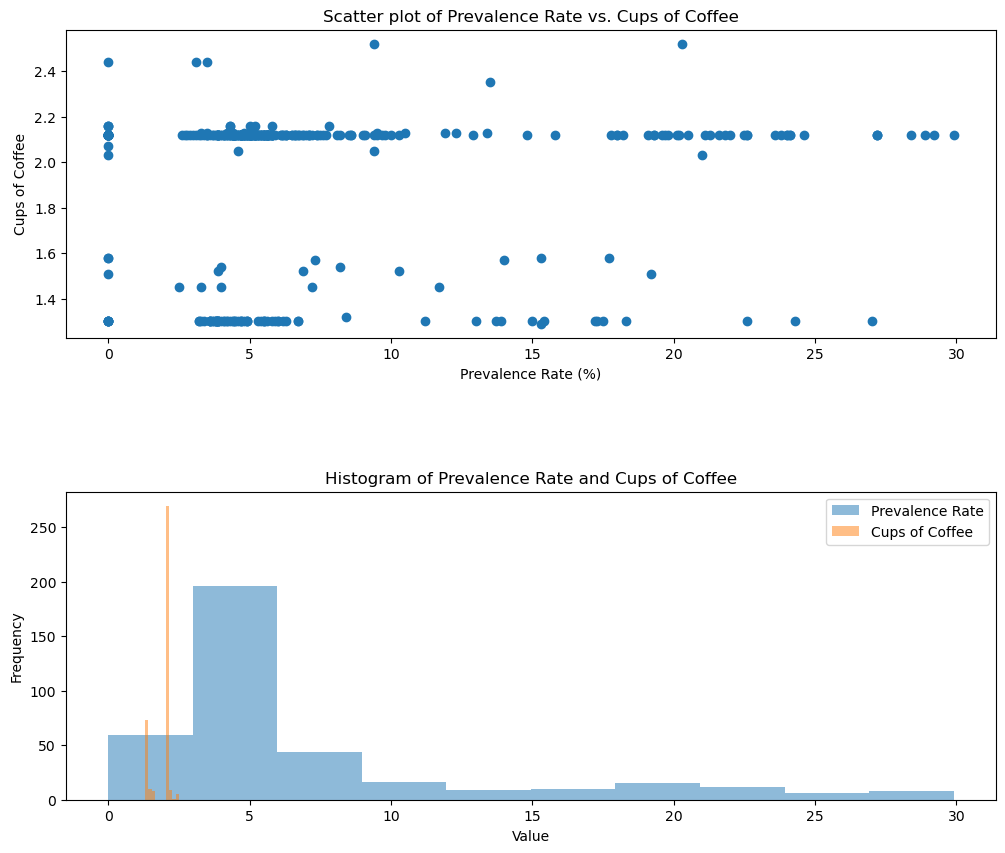

t-statistic: 14.837651579212578, p-value: 1.565900026141764e-39


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
plt.figure(figsize=(12, 10)) 

plt.subplot(2, 1, 1)
plt.scatter(merged_df['Prevalence Rate (%)'], merged_df['Cups of Coffee'])
plt.xlabel('Prevalence Rate (%)')
plt.ylabel('Cups of Coffee')
plt.title('Scatter plot of Prevalence Rate vs. Cups of Coffee')
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 1, 2)
plt.hist(merged_df['Prevalence Rate (%)'], alpha=0.5, label='Prevalence Rate')
plt.hist(merged_df['Cups of Coffee'], alpha=0.5, label='Cups of Coffee')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Histogram of Prevalence Rate and Cups of Coffee')
plt.show()

t_statistic, p_value = stats.ttest_ind(merged_df['Prevalence Rate (%)'], merged_df['Cups of Coffee'], equal_var=False)
print(f"t-statistic: {t_statistic}, p-value: {p_value}")


In [32]:
# print out the conclusion
print("Conclusion: There is a significant difference between the prevalence rate of diabetes and the cups of coffee consumed per person in the US. The p-value is less than 0.05, so we reject the null hypothesis. The prevalence rate of diabetes and the cups of coffee consumed per person in the US are not independent of each other.")


Conclusion: There is a significant difference between the prevalence rate of diabetes and the cups of coffee consumed per person in the US. The p-value is less than 0.05, so we reject the null hypothesis. The prevalence rate of diabetes and the cups of coffee consumed per person in the US are not independent of each other.
